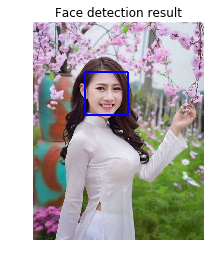

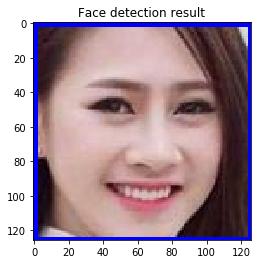

In [3]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
import sys
import os.path
from urllib.request import urlopen

bgr_img = cv2.imread("img.jpg")

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
face_classifier_xml = 'my_haarcascade_frontalface_default.xml'

face_cascade = cv2.CascadeClassifier(face_classifier_xml)
faces = face_cascade.detectMultiScale(gray_img, 1.25, 3)
# crop_img = null
for (x, y, w, h) in faces:
    cv2.rectangle(bgr_img, (x, y), (x + w, y + h), (255, 0, 0), 4)
    crop_img = bgr_img[y:y+h, x:x+w]
    cv2.imwrite('face_2.jpg',crop_img);
    


plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('Face detection result')
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.show()